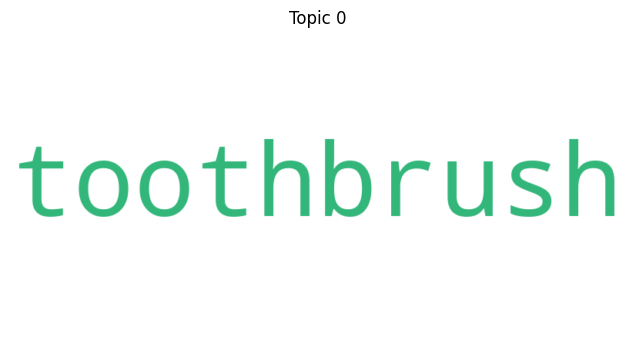

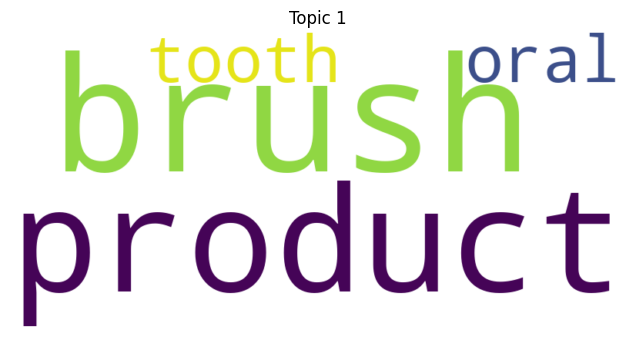

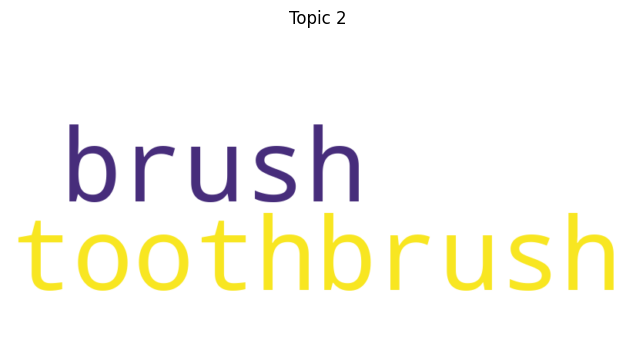

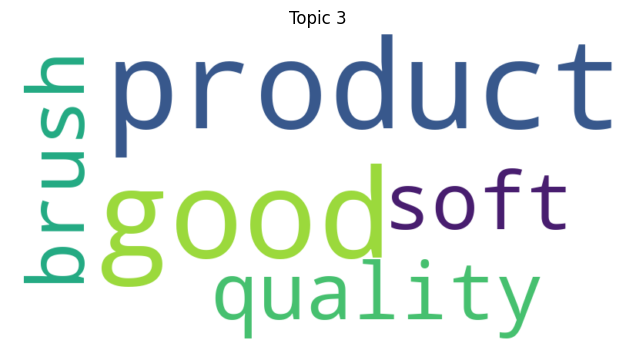

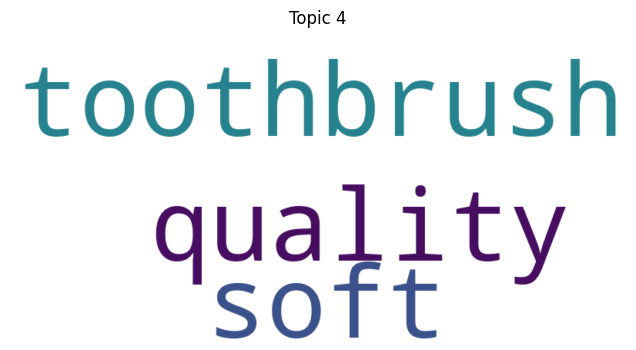

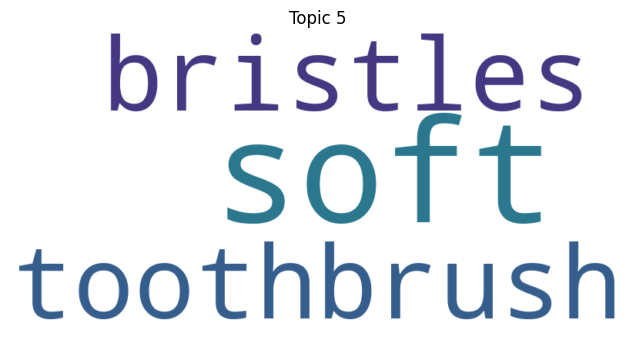

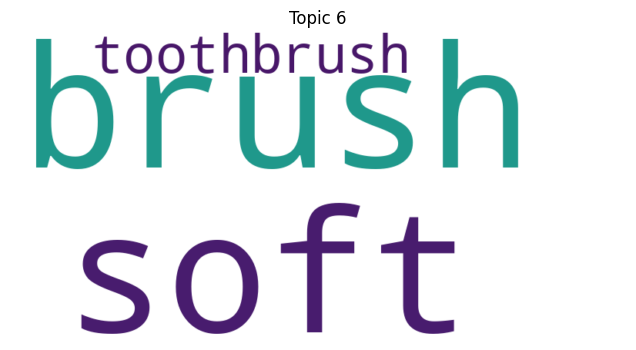

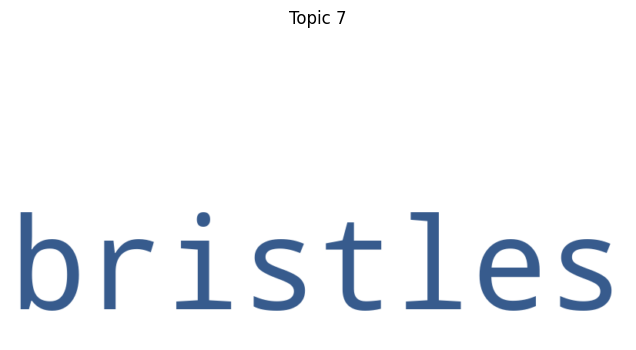

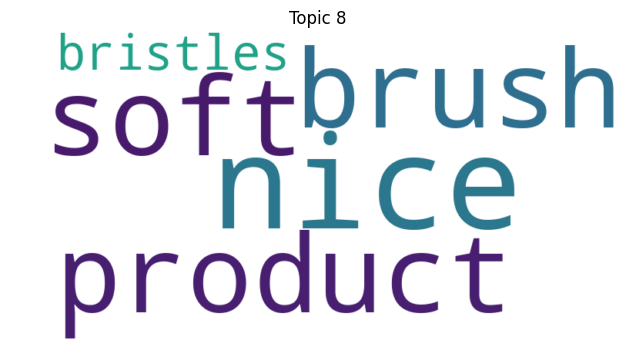

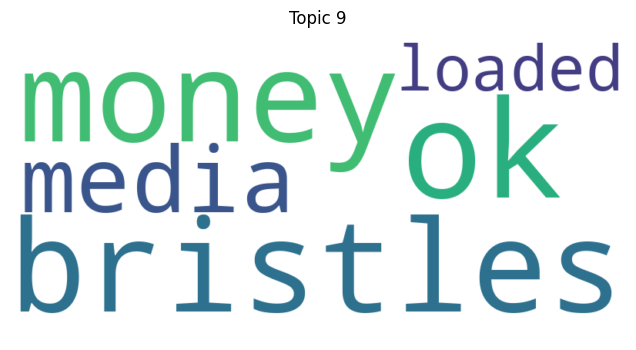

Model Coherence Score: 0.4250


In [25]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.utils import simple_preprocess
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')

tokenized = []


def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join(lemmatizer.lemmatize(word) for word in text)

with open('./ml/data/toothbrush.txt', 'r') as f:
    for line in f:
        tokenized.append(simple_preprocess(line, deacc=True))

lemmatized_texts = [lemmatize_text(doc) for doc in tokenized]

id2word = corpora.Dictionary(tokenized)
corpus = [id2word.doc2bow(text) for text in tokenized]

num_topics = 10
passes = 100
iterations = 1000
eval_every = None 

lda_model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

topics = lda_model.show_topics(num_topics=10, num_words=10)

for topic_id, topic_words in topics:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(topic_words)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic {topic_id}")
    plt.axis('off')
    plt.show()

print(f"Model Coherence Score: {coherence_lda:.4f}")


In [20]:
pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.6 MB/s eta 0:00:003.8 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 789.1/789.1 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 21.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
